In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e

# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

In [4]:
import torch
import torch.nn as nn

In [5]:
print(torch.__version__)

1.8.1


In [8]:
train_X

array([[3.3134501 , 4.66244614],
       [5.75213134, 2.5401607 ],
       [7.71834205, 2.17912516],
       ...,
       [9.11630959, 4.36470787],
       [1.19523073, 8.80427333],
       [9.49618921, 8.01482849]])

In [9]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2,1,bias = True)

    def forward(self, x):
        x = self.linear(x)
        return x

In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.linear1 = nn.Linear(2,200)
        self.linear2 = nn.Linear(200,1)
        self.act = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.act(x)
        x = self.linear2(x)
        return x

In [11]:
reg_loss = nn.MSELoss()

In [13]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error


model = MLP()

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr =lr)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000
for i in range(epoch):
    
    #### train ####
    model.train()
    optimizer.zero_grad()
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    # print(input_x.shape, true_y.shape, pred_y.shape)
    
    loss = reg_loss(pred_y.squeeze(),true_y)
    loss.backward() # gradient 계산
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    
    
    #### val ####
    model.eval()
    optimizer.zero_grad()
    
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy()) # or loss.item()
    
    
    ##### Evaluation-test #####
    if i % 200 == 0:
        
        #### MAE ####
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy()
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)

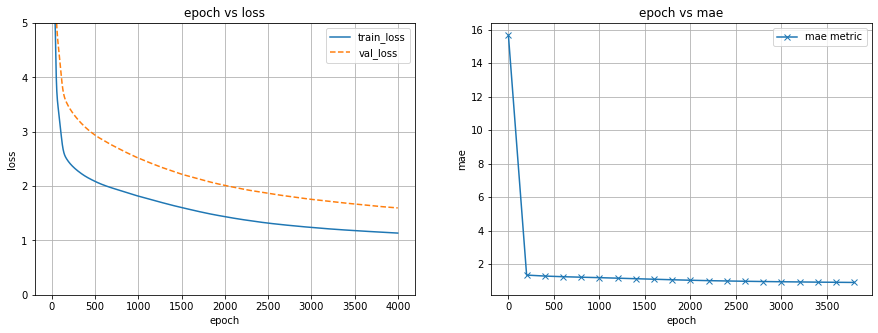

In [16]:
fig = plt.figure(figsize=(15,5))

###### loss fluctuation ####
ax1 = fig.add_subplot(1,2,1)
ax1.plot(list_epoch, list_train_loss, label = 'train_loss')
ax1.plot(list_epoch, list_val_loss,'--' ,label = 'val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0,5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

########## metric fluctuation #######

ax2 = fig.add_subplot(1,2,2)
ax2.plot(list_mae_epoch,list_mae, marker='x',label ='mae metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')

ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

plt.show()
